
# Preguntas de Negocio - GOLD



In [ ]:
!pip install snowflake-connector-python

In [ ]:

# Configuración de conexión Snowflake
import os
import pandas as pd
import matplotlib.pyplot as plt
import snowflake.connector
import seaborn as sns

def get_conn():
    return snowflake.connector.connect(
        account="GNUKGWS-DZC91018",
        user="MARTINA_SERVICE_USER",
        password="martinaserviceuser",
        role="ROLE_MARTINA_SERVICE",
        warehouse="COMPUTE_WH",
        database="NY_TAXI",
        schema="SILVER_GOLD",
        client_session_keep_alive=True,
    )

def run_sql(sql: str, params=None):
    with get_conn() as con:
        df = pd.read_sql(sql, con, params=params)
    display(df.head(20))
    print(f"→ {len(df):,} filas")
    return df

print("Conexión lista.")


Conexión lista.



## 1) Demanda por zona y mes
¿Cuáles son las 10 zonas con más viajes por mes? (PU y
DO por separado).

In [56]:
def top_zones_acumulado_por_mes(tipo="PU"):
    """
    tipo: "PU" para pickup, "DO" para dropoff
    """
    zone_field = "PU_ZONE_SK" if tipo.upper() == "PU" else "DO_ZONE_SK"
    tipo_nombre = "Pickup" if tipo.upper() == "PU" else "Dropoff"

    sql = f"""
    SELECT
        EXTRACT(MONTH FROM f.PICKUP_DATETIME) AS MONTH,
        dz.ZONE AS ZONE_NAME,
        dz.BOROUGH,
        COUNT(*) AS TOTAL_TRIPS
    FROM FCT_TRIPS f
    JOIN DIM_ZONE dz
        ON f.{zone_field} = dz.ZONE_SK
    WHERE EXTRACT(YEAR FROM f.PICKUP_DATETIME) BETWEEN 2015 AND 2025
    GROUP BY MONTH, dz.ZONE, dz.BOROUGH
    ORDER BY MONTH, TOTAL_TRIPS DESC
    """
    df = run_sql(sql)
    df.columns = df.columns.str.lower()

    # Para cada mes (1-12), tomar top 10
    for m in sorted(df["month"].unique()):
        subdf = df[df["month"] == m].nlargest(10, "total_trips")
        print(f"\n {tipo_nombre.upper()} - TOP 10 ZONAS MES {m:02d} (2015-2025) ")
        display(subdf[["zone_name","borough","total_trips"]])

    return df

print(">>> TOP 10 ZONAS PICKUP")
df_pickup = top_zones_acumulado_por_mes("PU")

print("\n\n>>> TOP 10 ZONAS DROPOFF")
df_dropoff = top_zones_acumulado_por_mes("DO")



>>> TOP 10 ZONAS PICKUP


/tmp/ipython-input-3581436249.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=params)


,MONTH,ZONE_NAME,BOROUGH,TOTAL_TRIPS
0,1,Upper East Side South,Manhattan,636617
1,1,Upper East Side North,Manhattan,614749
2,1,Midtown Center,Manhattan,564969
3,1,JFK Airport,Queens,556528
4,1,Penn Station/Madison Sq West,Manhattan,446750
5,1,Midtown East,Manhattan,434374
6,1,Lincoln Square East,Manhattan,427159
7,1,Times Sq/Theatre District,Manhattan,405381
8,1,Upper West Side South,Manhattan,383695
9,1,Murray Hill,Manhattan,374193


→ 3,135 filas

 PICKUP - TOP 10 ZONAS MES 01 (2015-2025) 


,zone_name,borough,total_trips
0,Upper East Side South,Manhattan,636617
1,Upper East Side North,Manhattan,614749
2,Midtown Center,Manhattan,564969
3,JFK Airport,Queens,556528
4,Penn Station/Madison Sq West,Manhattan,446750
5,Midtown East,Manhattan,434374
6,Lincoln Square East,Manhattan,427159
7,Times Sq/Theatre District,Manhattan,405381
8,Upper West Side South,Manhattan,383695
9,Murray Hill,Manhattan,374193



 PICKUP - TOP 10 ZONAS MES 02 (2015-2025) 


,zone_name,borough,total_trips
261,Upper East Side South,Manhattan,634792
262,Upper East Side North,Manhattan,605316
263,Midtown Center,Manhattan,584753
264,JFK Airport,Queens,486966
265,Penn Station/Madison Sq West,Manhattan,447938
266,Midtown East,Manhattan,444949
267,Lincoln Square East,Manhattan,424719
268,Times Sq/Theatre District,Manhattan,408586
269,Upper West Side South,Manhattan,390153
270,Murray Hill,Manhattan,389394



 PICKUP - TOP 10 ZONAS MES 03 (2015-2025) 


,zone_name,borough,total_trips
522,Upper East Side South,Manhattan,733817
523,Midtown Center,Manhattan,702825
524,Upper East Side North,Manhattan,674827
525,JFK Airport,Queens,640917
526,Midtown East,Manhattan,542658
527,Penn Station/Madison Sq West,Manhattan,529493
528,Lincoln Square East,Manhattan,504829
529,Times Sq/Theatre District,Manhattan,504473
530,Murray Hill,Manhattan,476785
531,Upper West Side South,Manhattan,454073



 PICKUP - TOP 10 ZONAS MES 04 (2015-2025) 


,zone_name,borough,total_trips
783,Upper East Side South,Manhattan,783664
784,Upper East Side North,Manhattan,712181
785,Midtown Center,Manhattan,692072
786,JFK Airport,Queens,665974
787,Lincoln Square East,Manhattan,530222
788,Midtown East,Manhattan,523135
789,Penn Station/Madison Sq West,Manhattan,519790
790,Times Sq/Theatre District,Manhattan,494929
791,Murray Hill,Manhattan,468871
792,Upper West Side South,Manhattan,468576



 PICKUP - TOP 10 ZONAS MES 05 (2015-2025) 


,zone_name,borough,total_trips
1045,Upper East Side South,Manhattan,860520
1046,Upper East Side North,Manhattan,775534
1047,JFK Airport,Queens,743181
1048,Midtown Center,Manhattan,721600
1049,Lincoln Square East,Manhattan,579020
1050,Midtown East,Manhattan,555169
1051,Penn Station/Madison Sq West,Manhattan,541319
1052,LaGuardia Airport,Queens,524831
1053,Times Sq/Theatre District,Manhattan,507896
1054,Murray Hill,Manhattan,503104



 PICKUP - TOP 10 ZONAS MES 06 (2015-2025) 


,zone_name,borough,total_trips
1306,Upper East Side South,Manhattan,814246
1307,JFK Airport,Queens,750211
1308,Upper East Side North,Manhattan,725250
1309,Midtown Center,Manhattan,715397
1310,Midtown East,Manhattan,567726
1311,Penn Station/Madison Sq West,Manhattan,560232
1312,Lincoln Square East,Manhattan,535715
1313,Murray Hill,Manhattan,520582
1314,Times Sq/Theatre District,Manhattan,505666
1315,LaGuardia Airport,Queens,499021



 PICKUP - TOP 10 ZONAS MES 07 (2015-2025) 


,zone_name,borough,total_trips
1567,JFK Airport,Queens,783520
1568,Midtown Center,Manhattan,696921
1569,Upper East Side South,Manhattan,670911
1570,Penn Station/Madison Sq West,Manhattan,577103
1571,Upper East Side North,Manhattan,567944
1572,Midtown East,Manhattan,547553
1573,Murray Hill,Manhattan,501065
1574,Times Sq/Theatre District,Manhattan,495538
1575,Lincoln Square East,Manhattan,470791
1576,LaGuardia Airport,Queens,456655



 PICKUP - TOP 10 ZONAS MES 08 (2015-2025) 


,zone_name,borough,total_trips
1828,JFK Airport,Queens,813040
1829,Midtown Center,Manhattan,660435
1830,Upper East Side South,Manhattan,646200
1831,Penn Station/Madison Sq West,Manhattan,571553
1832,Upper East Side North,Manhattan,539649
1833,Midtown East,Manhattan,526745
1834,Murray Hill,Manhattan,489131
1835,Times Sq/Theatre District,Manhattan,467297
1836,LaGuardia Airport,Queens,465258
1837,Lincoln Square East,Manhattan,431360



 PICKUP - TOP 10 ZONAS MES 09 (2015-2025) 


,zone_name,borough,total_trips
2089,Upper East Side South,Manhattan,644228
2090,JFK Airport,Queens,618435
2091,Upper East Side North,Manhattan,583788
2092,Midtown Center,Manhattan,521290
2093,Penn Station/Madison Sq West,Manhattan,454938
2094,Midtown East,Manhattan,434051
2095,Lincoln Square East,Manhattan,419483
2096,Murray Hill,Manhattan,401644
2097,LaGuardia Airport,Queens,384036
2098,Times Sq/Theatre District,Manhattan,384011



 PICKUP - TOP 10 ZONAS MES 10 (2015-2025) 


,zone_name,borough,total_trips
2350,Upper East Side South,Manhattan,784667
2351,Upper East Side North,Manhattan,704343
2352,JFK Airport,Queens,667367
2353,Midtown Center,Manhattan,662431
2354,Lincoln Square East,Manhattan,524585
2355,Midtown East,Manhattan,522589
2356,Penn Station/Madison Sq West,Manhattan,506883
2357,Murray Hill,Manhattan,465948
2358,Times Sq/Theatre District,Manhattan,464310
2359,Upper West Side South,Manhattan,451016



 PICKUP - TOP 10 ZONAS MES 11 (2015-2025) 


,zone_name,borough,total_trips
2611,Upper East Side South,Manhattan,757840
2612,Upper East Side North,Manhattan,680549
2613,Midtown Center,Manhattan,653610
2614,JFK Airport,Queens,602683
2615,Midtown East,Manhattan,500065
2616,Lincoln Square East,Manhattan,498044
2617,Penn Station/Madison Sq West,Manhattan,486097
2618,Times Sq/Theatre District,Manhattan,453257
2619,Upper West Side South,Manhattan,433794
2620,Murray Hill,Manhattan,432877



 PICKUP - TOP 10 ZONAS MES 12 (2015-2025) 


,zone_name,borough,total_trips
2873,Upper East Side South,Manhattan,737718
2874,Upper East Side North,Manhattan,673273
2875,JFK Airport,Queens,601432
2876,Midtown Center,Manhattan,588868
2877,Lincoln Square East,Manhattan,516713
2878,Midtown East,Manhattan,499623
2879,Penn Station/Madison Sq West,Manhattan,489690
2880,Times Sq/Theatre District,Manhattan,449058
2881,Upper West Side South,Manhattan,441804
2882,Midtown North,Manhattan,424856




>>> TOP 10 ZONAS DROPOFF


/tmp/ipython-input-3581436249.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=params)


,MONTH,ZONE_NAME,BOROUGH,TOTAL_TRIPS
0,1,Upper East Side North,Manhattan,646182
1,1,Upper East Side South,Manhattan,573681
2,1,Midtown Center,Manhattan,461049
3,1,Upper West Side South,Manhattan,388536
4,1,Lenox Hill West,Manhattan,381362
5,1,Murray Hill,Manhattan,379997
6,1,Lincoln Square East,Manhattan,378933
7,1,Times Sq/Theatre District,Manhattan,347575
8,1,Midtown East,Manhattan,340756
9,1,Upper West Side North,Manhattan,334477


→ 3,128 filas

 DROPOFF - TOP 10 ZONAS MES 01 (2015-2025) 


,zone_name,borough,total_trips
0,Upper East Side North,Manhattan,646182
1,Upper East Side South,Manhattan,573681
2,Midtown Center,Manhattan,461049
3,Upper West Side South,Manhattan,388536
4,Lenox Hill West,Manhattan,381362
5,Murray Hill,Manhattan,379997
6,Lincoln Square East,Manhattan,378933
7,Times Sq/Theatre District,Manhattan,347575
8,Midtown East,Manhattan,340756
9,Upper West Side North,Manhattan,334477



 DROPOFF - TOP 10 ZONAS MES 02 (2015-2025) 


,zone_name,borough,total_trips
260,Upper East Side North,Manhattan,636009
261,Upper East Side South,Manhattan,569787
262,Midtown Center,Manhattan,472074
263,Murray Hill,Manhattan,395022
264,Upper West Side South,Manhattan,390181
265,Lenox Hill West,Manhattan,379021
266,Lincoln Square East,Manhattan,374447
267,Times Sq/Theatre District,Manhattan,354138
268,Midtown East,Manhattan,346401
269,Upper West Side North,Manhattan,334528



 DROPOFF - TOP 10 ZONAS MES 03 (2015-2025) 


,zone_name,borough,total_trips
520,Upper East Side North,Manhattan,712351
521,Upper East Side South,Manhattan,659426
522,Midtown Center,Manhattan,580516
523,Murray Hill,Manhattan,481953
524,Times Sq/Theatre District,Manhattan,454924
525,Upper West Side South,Manhattan,454618
526,Lincoln Square East,Manhattan,443734
527,Lenox Hill West,Manhattan,440308
528,Midtown East,Manhattan,435809
529,Clinton East,Manhattan,405678



 DROPOFF - TOP 10 ZONAS MES 04 (2015-2025) 


,zone_name,borough,total_trips
780,Upper East Side North,Manhattan,748176
781,Upper East Side South,Manhattan,703244
782,Midtown Center,Manhattan,584317
783,Murray Hill,Manhattan,470871
784,Upper West Side South,Manhattan,464788
785,Times Sq/Theatre District,Manhattan,461535
786,Lincoln Square East,Manhattan,455865
787,Lenox Hill West,Manhattan,438092
788,Midtown East,Manhattan,430823
789,Clinton East,Manhattan,401081



 DROPOFF - TOP 10 ZONAS MES 05 (2015-2025) 


,zone_name,borough,total_trips
1041,Upper East Side North,Manhattan,807679
1042,Upper East Side South,Manhattan,770536
1043,Midtown Center,Manhattan,626821
1044,Murray Hill,Manhattan,499298
1045,Lincoln Square East,Manhattan,491595
1046,Upper West Side South,Manhattan,489844
1047,Times Sq/Theatre District,Manhattan,484831
1048,Midtown East,Manhattan,464919
1049,Lenox Hill West,Manhattan,460762
1050,East Chelsea,Manhattan,419287



 DROPOFF - TOP 10 ZONAS MES 06 (2015-2025) 


,zone_name,borough,total_trips
1302,Upper East Side North,Manhattan,755425
1303,Upper East Side South,Manhattan,722847
1304,Midtown Center,Manhattan,626426
1305,Murray Hill,Manhattan,512719
1306,Times Sq/Theatre District,Manhattan,487998
1307,Midtown East,Manhattan,480815
1308,Upper West Side South,Manhattan,475380
1309,Lincoln Square East,Manhattan,463940
1310,Lenox Hill West,Manhattan,456161
1311,Clinton East,Manhattan,428583



 DROPOFF - TOP 10 ZONAS MES 07 (2015-2025) 


,zone_name,borough,total_trips
1563,Upper East Side North,Manhattan,599973
1564,Midtown Center,Manhattan,597361
1565,Upper East Side South,Manhattan,592170
1566,Murray Hill,Manhattan,489782
1567,Times Sq/Theatre District,Manhattan,484696
1568,Midtown East,Manhattan,455389
1569,Clinton East,Manhattan,417751
1570,Lincoln Square East,Manhattan,411159
1571,Upper West Side South,Manhattan,409209
1572,Lenox Hill West,Manhattan,408337



 DROPOFF - TOP 10 ZONAS MES 08 (2015-2025) 


,zone_name,borough,total_trips
1824,Upper East Side South,Manhattan,576061
1825,Upper East Side North,Manhattan,573807
1826,Midtown Center,Manhattan,566361
1827,Murray Hill,Manhattan,480183
1828,Times Sq/Theatre District,Manhattan,456890
1829,Midtown East,Manhattan,434189
1830,Clinton East,Manhattan,405343
1831,Lenox Hill West,Manhattan,402832
1832,Upper West Side South,Manhattan,397022
1833,East Chelsea,Manhattan,388561



 DROPOFF - TOP 10 ZONAS MES 09 (2015-2025) 


,zone_name,borough,total_trips
2085,Upper East Side North,Manhattan,603894
2086,Upper East Side South,Manhattan,576012
2087,Midtown Center,Manhattan,465924
2088,Murray Hill,Manhattan,399004
2089,Upper West Side South,Manhattan,373556
2090,Lincoln Square East,Manhattan,364895
2091,Times Sq/Theatre District,Manhattan,363682
2092,Lenox Hill West,Manhattan,361885
2093,Midtown East,Manhattan,353645
2094,Clinton East,Manhattan,340038



 DROPOFF - TOP 10 ZONAS MES 10 (2015-2025) 


,zone_name,borough,total_trips
2345,Upper East Side North,Manhattan,741599
2346,Upper East Side South,Manhattan,701280
2347,Midtown Center,Manhattan,566786
2348,Murray Hill,Manhattan,459937
2349,Lincoln Square East,Manhattan,453279
2350,Upper West Side South,Manhattan,451473
2351,Lenox Hill West,Manhattan,434109
2352,Times Sq/Theatre District,Manhattan,429699
2353,Midtown East,Manhattan,426391
2354,Clinton East,Manhattan,386405



 DROPOFF - TOP 10 ZONAS MES 11 (2015-2025) 


,zone_name,borough,total_trips
2607,Upper East Side North,Manhattan,714779
2608,Upper East Side South,Manhattan,676186
2609,Midtown Center,Manhattan,562255
2610,Upper West Side South,Manhattan,431031
2611,Murray Hill,Manhattan,430510
2612,Lincoln Square East,Manhattan,428301
2613,Times Sq/Theatre District,Manhattan,419278
2614,Lenox Hill West,Manhattan,414609
2615,Midtown East,Manhattan,410618
2616,Clinton East,Manhattan,367629



 DROPOFF - TOP 10 ZONAS MES 12 (2015-2025) 


,zone_name,borough,total_trips
2868,Upper East Side North,Manhattan,693699
2869,Upper East Side South,Manhattan,646697
2870,Midtown Center,Manhattan,549869
2871,Upper West Side South,Manhattan,431558
2872,Lincoln Square East,Manhattan,429746
2873,Times Sq/Theatre District,Manhattan,424103
2874,Murray Hill,Manhattan,420333
2875,Midtown East,Manhattan,416422
2876,Lenox Hill West,Manhattan,407018
2877,Clinton East,Manhattan,379839



## 2) Ingresos y tip % por *borough* y mes
¿Cómo varían los **ingresos** y el **tip %** por *borough* y mes?


/tmp/ipython-input-3581436249.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=params)


,BOROUGH,YEAR,MONTH,TOTAL_REVENUE,AVG_TIP_PCT
0,Bronx,2020,4,79028.02,9.530686
1,Bronx,2020,5,93783.27,6.333061
2,Bronx,2020,6,111185.78,8.214906
3,Bronx,2020,7,124255.08,8.022851
4,Bronx,2020,8,132397.60,8.427733
5,Bronx,2020,9,128441.03,10.745490
6,Bronx,2020,10,121828.24,10.742206
7,Bronx,2020,11,108928.74,11.172144
8,Bronx,2020,12,126785.94,11.068811
9,Bronx,2021,1,116101.64,7.055596


→ 522 filas


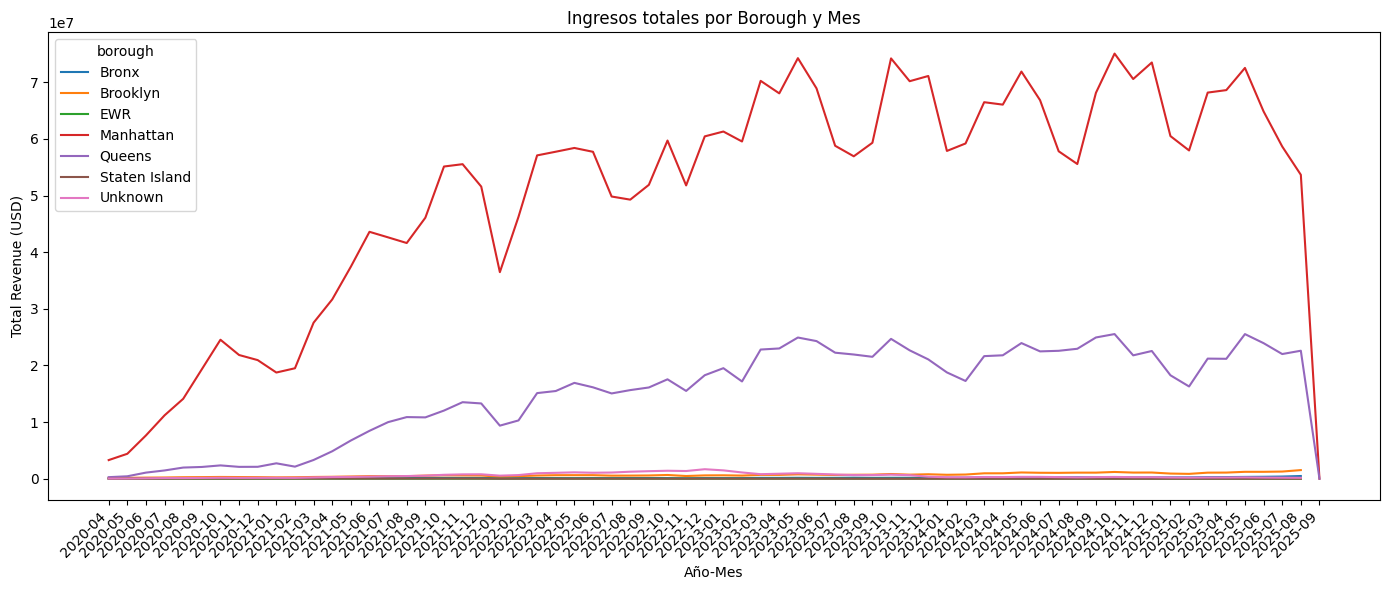

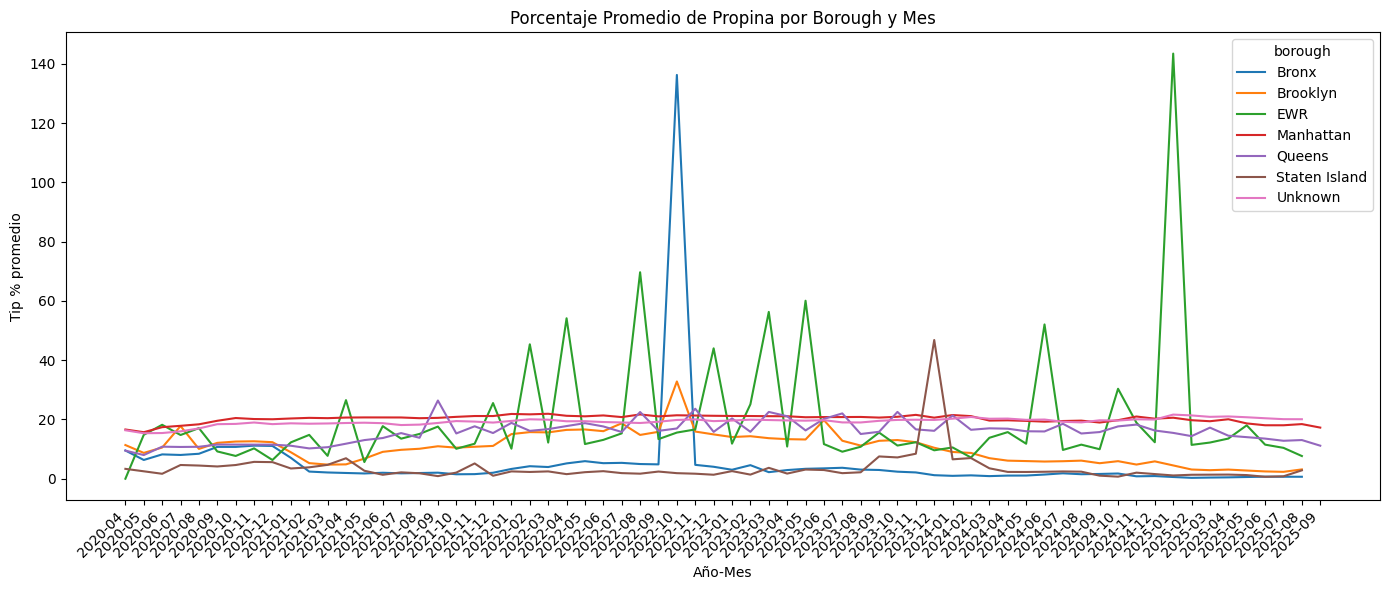

In [ ]:
query_revenue_tips = """
SELECT
    dz.borough,
    EXTRACT(YEAR FROM f.PICKUP_DATETIME) AS YEAR,
    EXTRACT(MONTH FROM f.PICKUP_DATETIME) AS MONTH,
    SUM(f.TOTAL_AMOUNT) AS TOTAL_REVENUE,
    AVG(f.TIP_PERCENTAGE) AS AVG_TIP_PCT
FROM fct_trips f
JOIN dim_zone dz
    ON f.PU_ZONE_SK = dz.ZONE_SK
WHERE EXTRACT(YEAR FROM f.PICKUP_DATETIME) BETWEEN 2015 AND 2025
GROUP BY dz.borough, YEAR, MONTH
ORDER BY dz.borough, YEAR, MONTH
"""

df_revenue_tips = run_sql(query_revenue_tips)

df_revenue_tips.columns = df_revenue_tips.columns.str.lower()

df_revenue_tips["periodo"] = (
    df_revenue_tips["year"].astype(int).astype(str) + "-" +
    df_revenue_tips["month"].astype(int).astype(str).str.zfill(2)
)

plt.figure(figsize=(14,6))
sns.lineplot(
    x="periodo",
    y="total_revenue",
    hue="borough",
    data=df_revenue_tips
)
plt.xticks(rotation=45, ha='right')
plt.title("Ingresos totales por Borough y Mes")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Año-Mes")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,6))
sns.lineplot(
    x="periodo",
    y="avg_tip_pct",
    hue="borough",
    data=df_revenue_tips
)
plt.xticks(rotation=45, ha='right')
plt.title("Porcentaje Promedio de Propina por Borough y Mes")
plt.ylabel("Tip % promedio")
plt.xlabel("Año-Mes")
plt.tight_layout()
plt.show()



## 3) Velocidad y congestión (mph) por franja horaria y *borough*
Promedio de **mph** por franja horaria y *borough* (diurno vs. nocturno).


In [ ]:

sql_mph = '''
SELECT
  z.borough,
  CASE WHEN f.pickup_hour BETWEEN 6 AND 18 THEN 'Day' ELSE 'Night' END AS day_night,
  AVG(f.mph) AS avg_mph,
  COUNT(*)   AS trips
FROM fct_trips f
JOIN dim_zone z ON f.pu_zone_sk = z.zone_sk
GROUP BY 1,2
ORDER BY 1,2;
'''
df_mph = run_sql(sql_mph)


/tmp/ipython-input-3581436249.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=params)


,BOROUGH,DAY_NIGHT,AVG_MPH,TRIPS
0,Bronx,Day,14.693560,666762
1,Bronx,Night,20.159487,219727
2,Brooklyn,Day,12.033838,2101822
3,Brooklyn,Night,15.391015,1185103
4,EWR,Day,88.517921,2395
5,EWR,Night,88.731636,586
6,Manhattan,Day,9.895483,110678626
7,Manhattan,Night,12.069339,54484961
8,Queens,Day,19.540019,10313486
9,Queens,Night,26.941837,6141821


→ 16 filas


Durante el día, Manhattan y Brooklyn son los boroughs más lentos (≈10–12 mph) debido a la congestión, mientras que Queens, Bronx y Staten Island alcanzan velocidades mayores, especialmente de noche (20–33 mph). En general, las noches son más rápidas que el día en todos los boroughs, reflejando menor tráfico fuera de horas laborales.


## 4) Duración del viaje — percentiles (p50/p90) por zona de pickup


/tmp/ipython-input-3581436249.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=params)


,PICKUP_ZONE_ID,PICKUP_ZONE_NAME,PICKUP_BOROUGH,P50_DURATION_MIN,P90_DURATION_MIN
0,5,Arden Heights,Staten Island,63.0,111.000000
1,86,Far Rockaway,Queens,48.0,90.000000
2,109,Great Kills,Staten Island,47.0,89.000000
3,117,Hammels/Arverne,Queens,46.0,85.000000
4,55,Coney Island,Brooklyn,37.0,83.054340
5,84,Eltingville/Annadale/Prince's Bay,Staten Island,49.0,82.200000
6,23,Bloomfield/Emerson Hill,Staten Island,47.0,81.000000
7,44,Charleston/Tottenville,Staten Island,55.0,81.000000
8,201,Rockaway Park,Queens,37.0,77.000000
9,110,Great Kills Park,Staten Island,62.0,76.400000


→ 20 filas
['PICKUP_ZONE_ID', 'PICKUP_ZONE_NAME', 'PICKUP_BOROUGH', 'P50_DURATION_MIN', 'P90_DURATION_MIN']


/tmp/ipython-input-4149545045.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


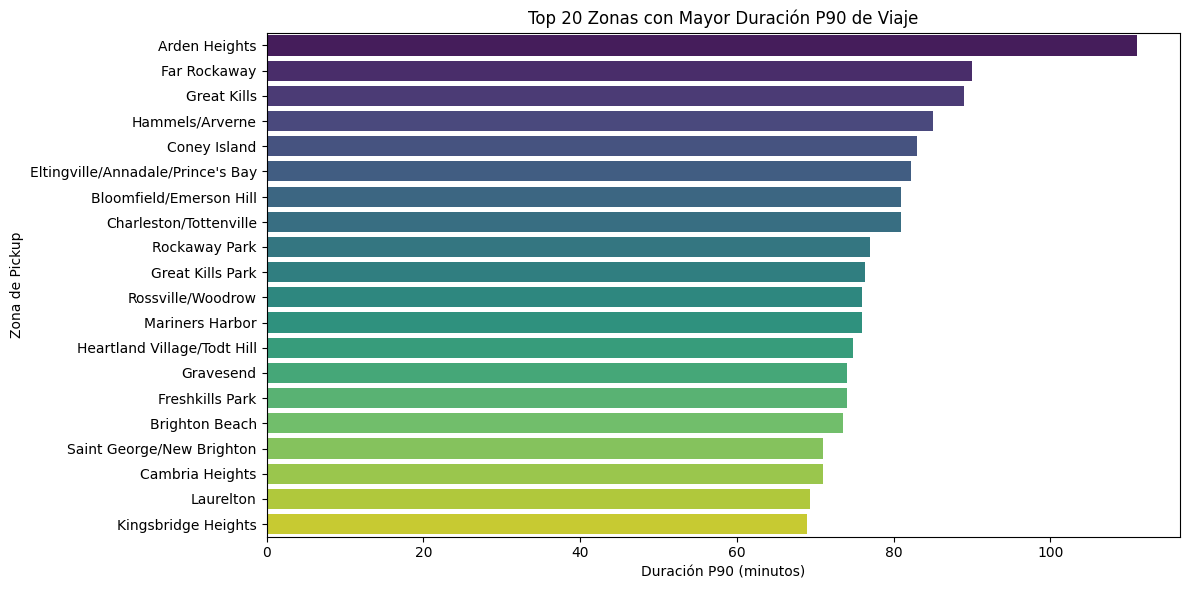

In [ ]:
query_duration = """
SELECT
    f.pu_zone_sk AS pickup_zone_id,
    dz.zone       AS pickup_zone_name,
    dz.borough    AS pickup_borough,
    APPROX_PERCENTILE(f.trip_duration_min, 0.5) AS p50_duration_min,
    APPROX_PERCENTILE(f.trip_duration_min, 0.9) AS p90_duration_min
FROM fct_trips f
LEFT JOIN dim_zone dz ON f.pu_zone_sk = dz.zone_sk
WHERE f.trip_duration_min IS NOT NULL
GROUP BY f.pu_zone_sk, dz.zone, dz.borough
ORDER BY p90_duration_min DESC
LIMIT 20
"""

df_duration = run_sql(query_duration)
print(df_duration.columns.tolist())


# ---- Visualización ----
plt.figure(figsize=(12, 6))
sns.barplot(
    x="P90_DURATION_MIN",
    y="PICKUP_ZONE_NAME",
    data=df_duration.sort_values("P90_DURATION_MIN", ascending=False),
    palette="viridis"
)
plt.xlabel("Duración P90 (minutos)")
plt.ylabel("Zona de Pickup")
plt.title("Top 20 Zonas con Mayor Duración P90 de Viaje")
plt.tight_layout()
plt.show()



El análisis de percentiles muestra que las zonas periféricas y de Staten Island (ej. Arden Heights, Far Rockaway, Great Kills, Hammels/Arverne) concentran las mayores duraciones de viaje en el percentil 90, superando 100 minutos en algunos casos.

El p50 (mediana) es mucho menor, pero igualmente se ve que estos barrios presentan trayectos más largos que zonas céntricas como Manhattan.

Esto confirma que la duración aumenta al alejarse de Manhattan y que hay fuerte variabilidad (p90 muy superior al p50).


## 5) Elasticidad temporal — distribución por día de semana y hora (picos)


/tmp/ipython-input-3581436249.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=params)


,DAY_OF_WEEK,PICKUP_HOUR,TOTAL_TRIPS
0,0,0,1277522
1,0,1,1034322
2,0,2,736689
3,0,3,508947
4,0,4,298819
5,0,5,150833
6,0,6,219680
7,0,7,320741
8,0,8,473572
9,0,9,740839


→ 168 filas


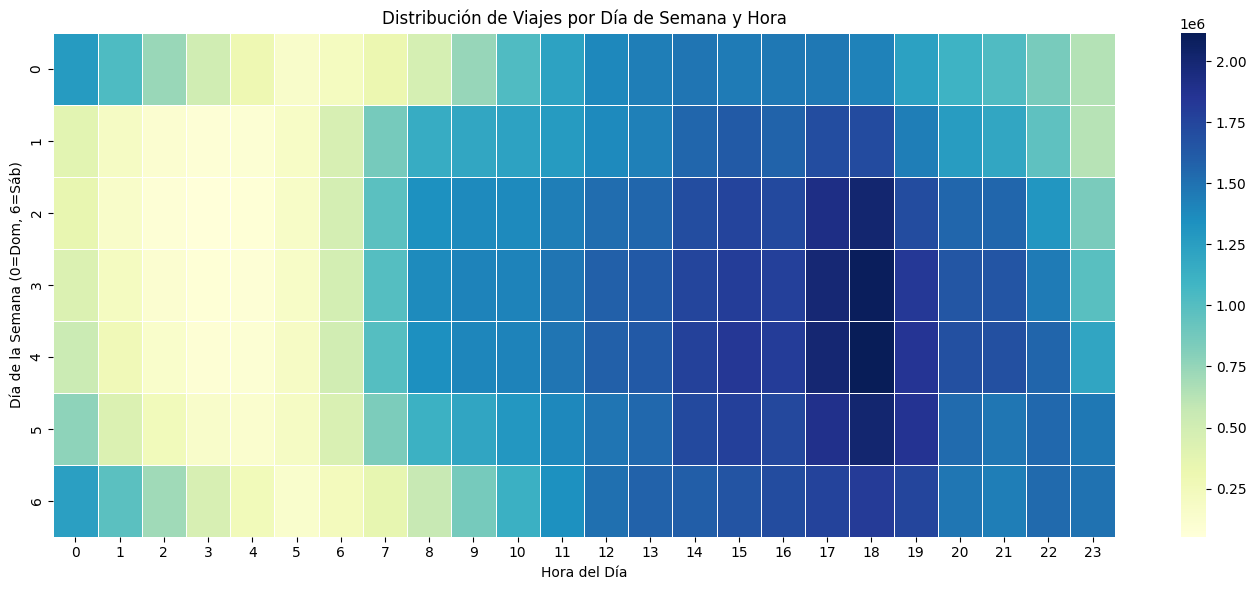

/tmp/ipython-input-3581436249.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=params)


,PICKUP_HOUR,TOTAL_TRIPS
0,18,13183473
1,17,12735375
2,15,11898539
3,16,11783292
4,19,11668242


→ 5 filas


/tmp/ipython-input-1155621906.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PICKUP_HOUR", y="TOTAL_TRIPS", data=df_peak, palette="viridis")


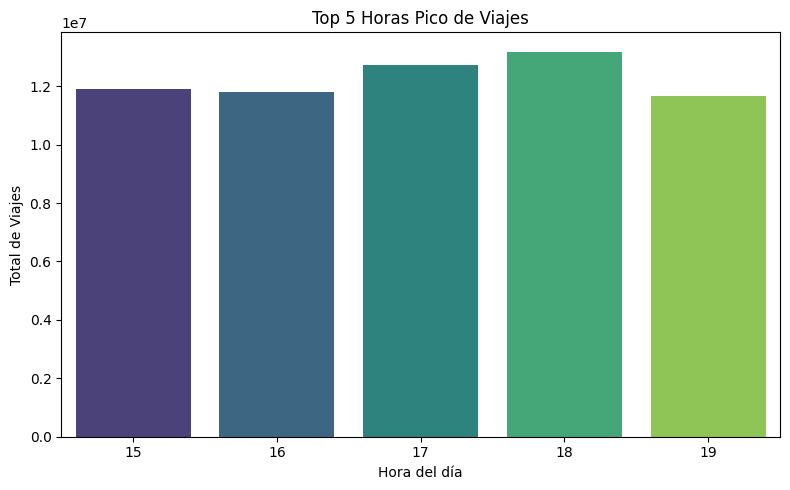

In [ ]:
query_heatmap = """
SELECT
    pickup_dow AS day_of_week,
    pickup_hour,
    COUNT(*) AS total_trips
FROM fct_trips
GROUP BY pickup_dow, pickup_hour
ORDER BY day_of_week, pickup_hour
"""

df_heatmap = run_sql(query_heatmap)

heatmap_data = df_heatmap.pivot(index="DAY_OF_WEEK", columns="PICKUP_HOUR", values="TOTAL_TRIPS")
heatmap_data = heatmap_data.fillna(0)

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5)
plt.title("Distribución de Viajes por Día de Semana y Hora")
plt.xlabel("Hora del Día")
plt.ylabel("Día de la Semana (0=Dom, 6=Sáb)")
plt.tight_layout()
plt.show()

query_peak_hours = """
SELECT
    pickup_hour,
    COUNT(*) AS total_trips
FROM fct_trips
GROUP BY pickup_hour
ORDER BY total_trips DESC
LIMIT 5
"""

df_peak = run_sql(query_peak_hours)

plt.figure(figsize=(8,5))
sns.barplot(x="PICKUP_HOUR", y="TOTAL_TRIPS", data=df_peak, palette="viridis")
plt.title("Top 5 Horas Pico de Viajes")
plt.xlabel("Hora del día")
plt.ylabel("Total de Viajes")
plt.tight_layout()
plt.show()


Para analizar la elasticidad temporal de la demanda de taxis, se generó un heatmap con el número de viajes agregados por día de la semana (pickup_dow) y hora del día (pickup_hour).

**El mapa de calor muestra un patrón claro:**

Mayor demanda en días laborales (lunes a viernes) entre las 15:00 y 20:00 h, con un pico marcado alrededor de las 17:00–18:00.

Los fines de semana presentan mayor concentración en horas nocturnas, especialmente viernes y sábado desde las 20:00 hasta pasada la medianoche.

Las horas de la madrugada (0:00–5:00) son las de menor actividad en general.

**Además, se calcularon las 5 horas con más viajes acumulados en todo el dataset:** 3:00pm, 4:00pm, 5:00pm, 6:00pm, 7:00pm.

Esto confirma que el pico principal de demanda ocurre entre las 15:00 y 19:00 h, con una hora punta clara alrededor de las 17–18 h, alineada con el horario de salida laboral.